# Flight Price Prediction 

Problem : To predict The Flight Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_column',None)

In [2]:
#laoding the training dataset
train_df = pd.read_csv('https://raw.githubusercontent.com/Annie-Dhawan/machine-learning-projects/main/Flight_Prediction/Dataset/Data_Train.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/Annie-Dhawan/machine-learning-projects/main/Flight_Prediction/Dataset/Test_set.csv')

In [3]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR _ DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU _ IXR _ BBI _ BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL _ LKO _ BOM _ COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU _ NAG _ BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR _ NAG _ DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_df.shape

(10683, 11)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


- The dates have not proper data type.

In [6]:
#checking for null values
print(train_df.isna().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


In [7]:
print(test_df.isna().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


- Very few null values are there in train data, only Route , Total_Stops have missing value.Hence we need to remove it. 
In Test Data we dont have any missing value.

In [8]:
train_df.dropna(inplace=True)

In [9]:
print(train_df.isna().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64


In [10]:
train_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [11]:
train_df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [12]:
train_df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [13]:
train_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

- Here we would need to change this col like 2 stops = 2 

In [14]:
train_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [15]:
train_df.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR _ DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897


### Feature Engineering

In [16]:
#for col Date of journey
#for training data
train_df['Journey_Date'] = train_df['Date_of_Journey'].str.split('/').str[0].astype(int)
train_df['Journey_Month'] = train_df['Date_of_Journey'].str.split('/').str[1].astype(int)
train_df['Journey_Year'] = train_df['Date_of_Journey'].str.split('/').str[2].astype(int)

#for testing data
test_df['Journey_Date'] = test_df['Date_of_Journey'].str.split('/').str[0].astype(int)
test_df['Journey_Month'] = test_df['Date_of_Journey'].str.split('/').str[1].astype(int)
test_df['Journey_Year'] = test_df['Date_of_Journey'].str.split('/').str[2].astype(int)

In [17]:
train_df.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR _ DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019


In [18]:
# for col Dep_Time - train data
train_df['Dep_Hour'] = pd.to_datetime(train_df['Dep_Time']).dt.hour
train_df['Dep_Min'] = pd.to_datetime(train_df['Dep_Time']).dt.minute

# for col Dep_Time - test data
test_df['Dep_Hour'] = pd.to_datetime(test_df['Dep_Time']).dt.hour
test_df['Dep_Min'] = pd.to_datetime(test_df['Dep_Time']).dt.minute

In [19]:
train_df.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Hour,Dep_Min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR _ DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20


In [20]:
# for col Dep_Time - train data
train_df['Dep_Hour'] = pd.to_datetime(train_df['Dep_Time']).dt.hour
train_df['Dep_Min'] = pd.to_datetime(train_df['Dep_Time']).dt.minute

# for col Dep_Time - test data
test_df['Dep_Hour'] = pd.to_datetime(test_df['Dep_Time']).dt.hour
test_df['Dep_Min'] = pd.to_datetime(test_df['Dep_Time']).dt.minute

In [21]:
# for col Arrival_Time - train data
train_df['Arrival_Hour'] = pd.to_datetime(train_df['Arrival_Time']).dt.hour
train_df['Arrival_Min'] = pd.to_datetime(train_df['Arrival_Time']).dt.minute

# for col Dep_Time - test data
test_df['Arrival_Hour'] = pd.to_datetime(test_df['Arrival_Time']).dt.hour
test_df['Arrival_Min'] = pd.to_datetime(test_df['Arrival_Time']).dt.minute

In [22]:
train_df.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR _ DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10


In [23]:
# for col 'Duration' - training data
duration = list(train_df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration


# for col 'Duration' - training data
duration_test=list(test_df['Duration'])
for i in range(len(duration_test)):
    if len(duration_test[i].split()) !=2:
        if "h" in duration_test[i]:
            duration_test[i]=duration_test[i].strip()+" 0m"
        else:
            duration_test[i]="0h "+duration_test[i]
            
duration_hourst=[]
duration_minst=[]
for i in range(len(duration_test)):
    duration_hourst.append(int(duration_test[i].split(sep="h")[0]))
    duration_minst.append(int(duration_test[i].split(sep="m")[0].split()[-1]))

In [24]:
train_df['Duration_hours'] = duration_hours
train_df['Duration_mins'] = duration_mins

test_df['Duration_hours'] = duration_hourst
test_df['Duration_mins'] = duration_minst

In [25]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR _ DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU _ IXR _ BBI _ BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL _ LKO _ BOM _ COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU _ NAG _ BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR _ NAG _ DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


### Handling Categorical Data.

In [26]:
train_df['Airline'].value_counts().sort_values()

Trujet                                  1
Vistara Premium economy                 3
Jet Airways Business                    6
Multiple carriers Premium economy      13
GoAir                                 194
Air Asia                              319
Vistara                               479
SpiceJet                              818
Multiple carriers                    1196
Air India                            1751
IndiGo                               2053
Jet Airways                          3849
Name: Airline, dtype: int64

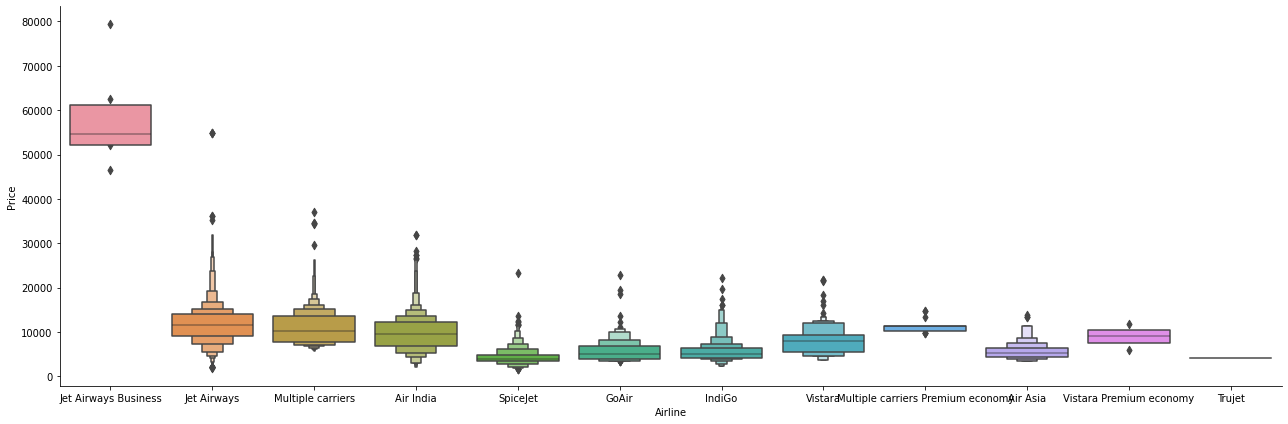

In [27]:
sns.catplot(y='Price',x='Airline',data=train_df.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

In [28]:
#converting categorical names to numerical cols using pd.get_dummies function
airline = train_df['Airline']
airline = pd.get_dummies(airline,drop_first = True)
airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [29]:
#for test data
airline_test = test_df['Airline']
airline_test = pd.get_dummies(airline_test,drop_first = True)

In [30]:
# for col Source - train
source = train_df[['Source']]
source = pd.get_dummies(source,drop_first=True)

source_test = test_df[['Source']]
source_test = pd.get_dummies(source_test,drop_first=True)

source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [31]:
# for col Source - train
dest = train_df[['Destination']]
dest = pd.get_dummies(dest,drop_first=True)

dest_test = test_df[['Destination']]
dest_test = pd.get_dummies(dest_test,drop_first=True)

dest.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [32]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR _ DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU _ IXR _ BBI _ BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL _ LKO _ BOM _ COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU _ NAG _ BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR _ NAG _ DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


In [33]:
#working on Total_Stops
train_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [34]:
#replacing 'non-stop' with '0 Stops'
train_df['Total_Stops'] = train_df['Total_Stops'].replace('non-stop','0 stops')
test_df['Total_Stops'] = test_df['Total_Stops'].replace('non-stop','0 stops')

In [35]:
#slitting
train_df['Total_Stops'] = train_df['Total_Stops'].str.split(' ').str[0].astype(int)

In [36]:
train_df['Total_Stops'].unique()

array([0, 2, 1, 3, 4])

In [37]:
train_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR _ DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU _ IXR _ BBI _ BLR,05:50,13:15,7h 25m,2,No info,7662,1,5,2019,5,50,13,15,7,25


In [38]:
#deleting the cols that are not required
train_df.drop(['Airline','Source','Destination','Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration','Additional_Info'],axis=1,inplace=True)

In [39]:
#concatinating cols
final_data = pd.concat([train_df,airline,source,dest],axis=1)

In [40]:
train_df.head()

,Total_Stops,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins
0,0,3897,24,3,2019,22,20,1,10,2,50
1,2,7662,1,5,2019,5,50,13,15,7,25
2,2,13882,9,6,2019,9,25,4,25,19,0
3,1,6218,12,5,2019,18,5,23,30,5,25
4,1,13302,1,3,2019,16,50,21,35,4,45


In [41]:
final_data.head()

,Total_Stops,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,2019,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,2019,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,2019,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,2019,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,2019,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [42]:
final_data.shape

(10682, 31)

In [45]:
final_data.to_csv('cleaned_data.csv')